In [95]:
import netCDF4
import matplotlib.pyplot as plt
import numpy
import matplotlib
%matplotlib inline

In [96]:
matplotlib.rcParams.update({'font.size': 18})

In [97]:
datafile = ("http://thredds.priv.socib.es/thredds/dodsC/research_vessel/"
            "current_profiler/socib_rv-scb_rdi001/L1/dep0002_socib-rv_scb-rdi001_L1_latest.nc")

Load variables from file

In [154]:
with netCDF4.Dataset(datafile) as nc:
    time = nc.variables['time'][:]
    time_units = nc.variables['time'].units
    depth = nc.variables['DEPTH_ADCP4'][:]
    depth_units = nc.variables['DEPTH_ADCP4'].units
    error_velocity = nc.variables['VEL_ERR'][:]
    error_velocity_units = nc.variables['VEL_ERR'].units
    error_velocity_title = nc.variables['VEL_ERR'].long_name
    qc_error_velocity = nc.variables['QC_VEL_ERR'][:]
    qc_error_velocity_title = nc.variables['QC_VEL_ERR'].long_name
    qc_correlation_magnitud = nc.variables['QC_CORR_BEAM1'][:]
    qc_correlation_magnitud_title = nc.variables['QC_CORR_BEAM1'].long_name
    correlation_magnitud = nc.variables['CORR_BEAM1'][:]
    correlation_magnitud_units = nc.variables['CORR_BEAM1'].units
    correlation_magnitud_title = nc.variables['CORR_BEAM1'].long_name
    u = nc.variables['VEL_EAS'][:]
    v = nc.variables['VEL_NOR'][:]

In [103]:
correlation_magnitud

array([[ 190.,  191.,  192., ...,  104.,  109.,  106.],
       [ 191.,  192.,  192., ...,  105.,  106.,  110.],
       [ 191.,  191.,  192., ...,  110.,  113.,  120.],
       ..., 
       [ 184.,  182.,  180., ...,  103.,  103.,  102.],
       [ 189.,  188.,  188., ...,  103.,  104.,  105.],
       [ 192.,  192.,  191., ...,  105.,  101.,  101.]])

In [26]:
time_converted = netCDF4.num2date(time, time_units)

Mask bad values

In [162]:
u_mask = numpy.ma.masked_where(np.isnan(u), u)
error_velocity = numpy.ma.masked_where(np.isnan(error_velocity), error_velocity)
correlation_magnitud = numpy.ma.masked_where(np.isnan(correlation_magnitud), correlation_magnitud)

# Plots

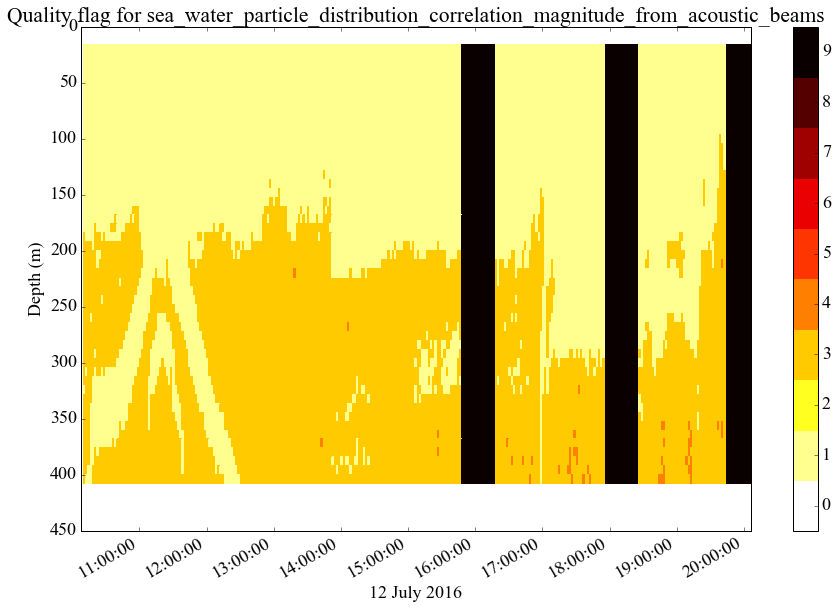

In [156]:
fig = plt.figure(figsize=(15, 10))
cmap_error = plt.cm.get_cmap('hot_r', 10)
plt.pcolor(time_converted[0:300], depth, qc_correlation_magnitud[0:300, :].T, 
           cmap=cmap_error,vmin=-.5, vmax = 9.5)
cbar = plt.colorbar(ticks=np.arange(0, 10.))
#cbar.set_label(correlation_magnitud_units, rotation=0, ha='left')
plt.xlabel('12 July 2016')
plt.ylabel('Depth' + ' (' + depth_units + ')')
plt.title(qc_correlation_magnitud_title.split('-')[-1])
plt.gca().invert_yaxis()
fig.autofmt_xdate()
# plt.savefig('QC_', dpi=300)
plt.show()
plt.close()

## Quality flag

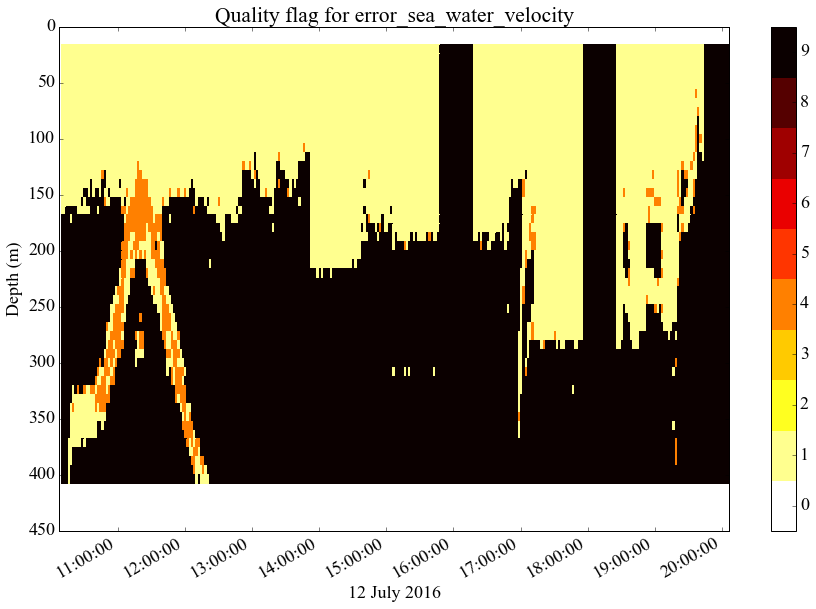

In [157]:
fig = plt.figure(figsize=(15, 10))
cmap_error = plt.cm.get_cmap('hot_r', 10)
plt.pcolor(time_converted[0:300], depth, qc_error_velocity[0:300, :].T, 
           cmap=cmap_error,vmin=-.5, vmax = 9.5)
cbar = plt.colorbar(ticks=np.arange(0, 10.))
#cbar.set_label(correlation_magnitud_units, rotation=0, ha='left')
plt.xlabel('12 July 2016')
plt.ylabel('Depth' + ' (' + depth_units + ')')
plt.title(qc_error_velocity_title.split('-')[-1])
plt.gca().invert_yaxis()
fig.autofmt_xdate()
plt.savefig('QC_error_sea_water_velocity', dpi=300)
plt.show()
plt.close()

Correlation

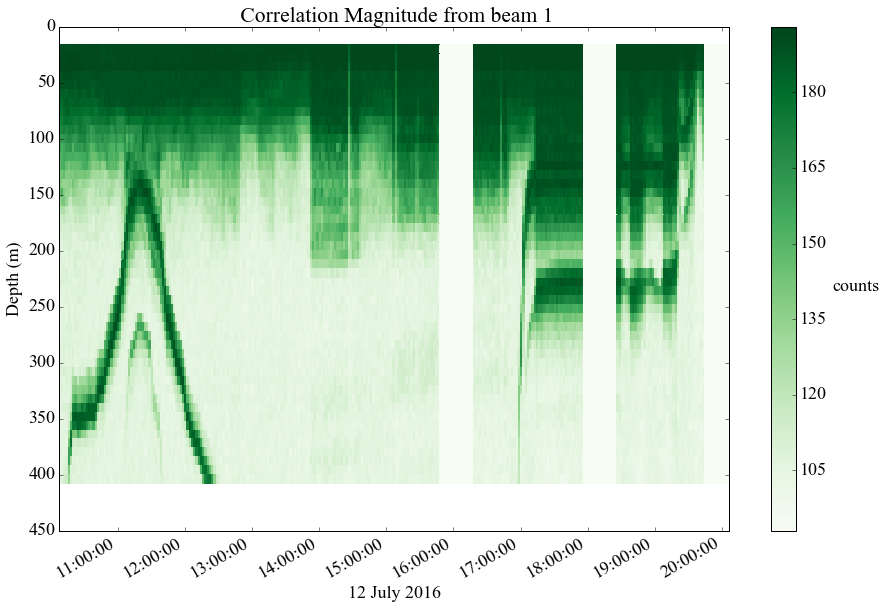

In [120]:
fig = plt.figure(figsize=(15, 10))
plt.pcolor(time_converted[0:300], depth, correlation_magnitud[0:300, :].T, 
           cmap=plt.cm.Greens, vmin=93, vmax=193)
cbar = plt.colorbar()
cbar.set_label(correlation_magnitud_units, rotation=0, ha='left')
plt.xlabel('12 July 2016')
plt.ylabel('Depth' + ' (' + depth_units + ')')
plt.title(correlation_magnitud_title.split('-')[-1])
plt.gca().invert_yaxis()
fig.autofmt_xdate()
plt.savefig('correlation_magnitud', dpi=300)
plt.show()
plt.close()

In [ ]:
Sea water velocity

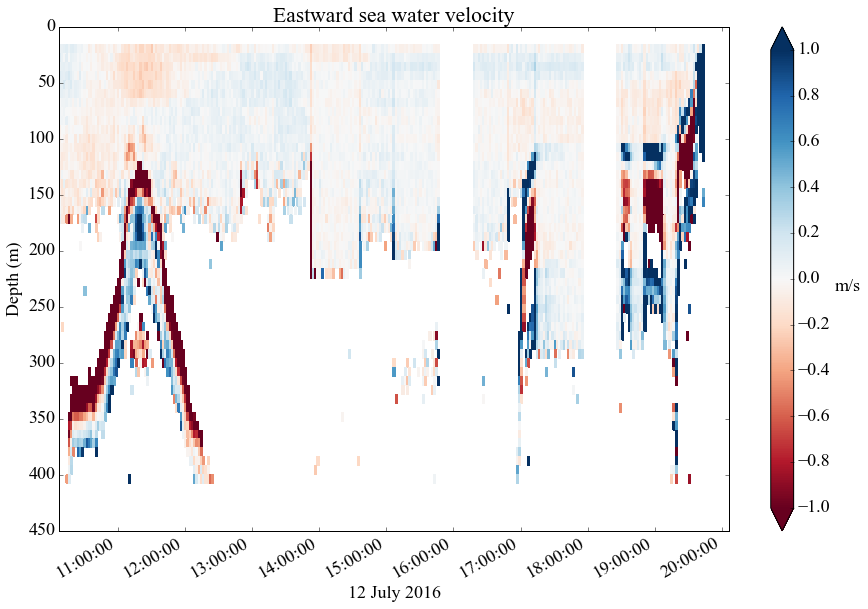

In [164]:
fig = plt.figure(figsize=(15, 10))
plt.pcolor(time_converted[0:300], depth, 0.001 * u_mask[0:300, :].T, cmap=plt.cm.RdBu, vmin=-1., vmax=1.)
cbar = plt.colorbar(extend='both')
cbar.set_label('m/s', rotation=0, ha='left')
plt.xlabel('12 July 2016')
plt.ylabel('Depth' + ' (' + depth_units + ')')
plt.title('Eastward sea water velocity')
plt.gca().invert_yaxis()
fig.autofmt_xdate()
plt.savefig('sea_water_velocity', dpi=300)
plt.show()
plt.close()

Error on sea water velocity

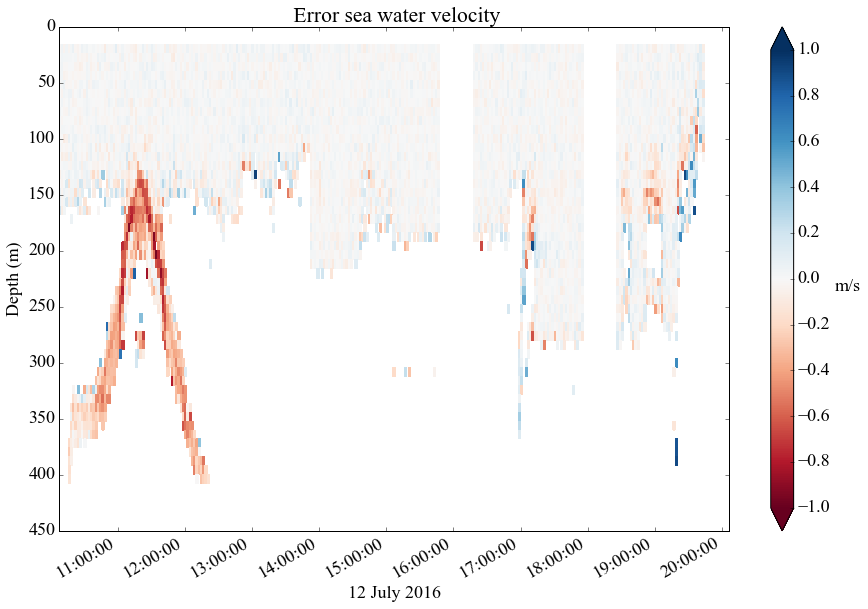

In [160]:
fig = plt.figure(figsize=(15, 10))
plt.pcolor(time_converted[0:300], depth, 0.001 * error_velocity[0:300, :].T, cmap=plt.cm.RdBu, vmin=-1., vmax=1.)
cbar = plt.colorbar(extend='both')
cbar.set_label('m/s', rotation=0, ha='left')
plt.xlabel('12 July 2016')
plt.ylabel('Depth' + ' (' + depth_units + ')')
plt.title(error_velocity_title.split('-')[-1])
plt.gca().invert_yaxis()
fig.autofmt_xdate()
plt.savefig('error_sea_water_velocity', dpi=300)
plt.show()
plt.close()

In [153]:
nc = netCDF4.Dataset(datafile)
nc.variables

OrderedDict([(u'trajectory', <type 'netCDF4._netCDF4.Variable'>
              |S1 trajectory(name_strlen)
                  cf_role: trajectory_id
              unlimited dimensions: 
              current shape = (22,)
              filling off), (u'time', <type 'netCDF4._netCDF4.Variable'>
              float64 time(time)
                  standard_name: time
                  units: seconds since 1970-01-01 00:00:00
                  axis: T
                  calendar: gregorian
              unlimited dimensions: time
              current shape = (2093,)
              filling off), (u'DEPTH_ADCP4', <type 'netCDF4._netCDF4.Variable'>
              float64 DEPTH_ADCP4(depth_adcp4)
                  standard_name: depth
                  units: m
                  positive: down
                  axis: Z
                  reference_datum: geographical coordinates, WGS84 projection
              unlimited dimensions: 
              current shape = (50,)
              filling off), (u'

In [119]:
time_converted[0]

datetime.datetime(2016, 7, 12, 10, 8)

(array([  5.00000000e+01,   1.69360000e+04,   0.00000000e+00,
          0.00000000e+00,   9.74000000e+02,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          8.66900000e+04]),
 array([ 0. ,  0.9,  1.8,  2.7,  3.6,  4.5,  5.4,  6.3,  7.2,  8.1,  9. ]),
 <a list of 10 Patch objects>)

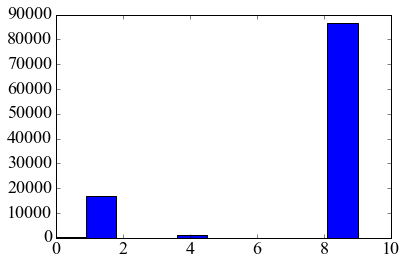

In [134]:
plt.hist(qc_error_velocity.flatten())